Your task as a data scientist is to build a linear regression model using the provided columns to predict housing prices accurately. Utilize the historical data available, and discuss the challenges and considerations in implementing a successful linear regression model for housing predictions. Highlight the importance of feature selection, data preprocessing, and model evaluation in achieving reliable and insightful results.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [34]:
df = pd.read_csv('American_Housing_Data_20231209.csv')
df.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601


In [35]:
df.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    2
Latitude                   0
Longitude                  0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39981 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39981 non-null  int64  
 1   Price                    39981 non-null  float64
 2   Beds                     39981 non-null  int64  
 3   Baths                    39981 non-null  int64  
 4   Living Space             39981 non-null  int64  
 5   Address                  39981 non-null  object 
 6   City                     39981 non-null  object 
 7   State                    39981 non-null  object 
 8   Zip Code Population      39981 non-null  int64  
 9   Zip Code Density         39981 non-null  float64
 10  County                   39981 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39981 non-null  float64
 13  Longitude                39981 non-null  float64
dtypes: float64(5), int64(5

In [37]:
df.shape

(39981, 14)

In [38]:
categorical_data = df.select_dtypes(include=['object','category'])
numerical_data = df.select_dtypes(include=['int','float'])
for x in categorical_data:
    df[x].fillna(df[x].mode()[0], inplace=True)
df.isnull().sum()


for x in numerical_data:
    df[x].fillna(np.mean(df[x]), inplace=True)
df.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    0
Latitude                   0
Longitude                  0
dtype: int64

In [39]:
encoder = LabelEncoder()
category = df.select_dtypes(include=['object','category'])
for x in category:
    df[x] = encoder.fit_transform(df[x])
df.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,33468,150,18,29563,20967.9,57,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,33468,150,18,29563,20967.9,57,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,5888,150,18,29815,23740.9,57,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,20579,150,18,29815,23740.9,57,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,35131,150,18,29815,23740.9,57,249880.0,40.73407,-74.00601


In [40]:
df.isnull().sum()

Zip Code                   0
Price                      0
Beds                       0
Baths                      0
Living Space               0
Address                    0
City                       0
State                      0
Zip Code Population        0
Zip Code Density           0
County                     0
Median Household Income    0
Latitude                   0
Longitude                  0
dtype: int64

In [41]:
x = df.drop(['Price'], axis = 1)
df.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,33468,150,18,29563,20967.9,57,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,33468,150,18,29563,20967.9,57,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,5888,150,18,29815,23740.9,57,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,20579,150,18,29815,23740.9,57,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,35131,150,18,29815,23740.9,57,249880.0,40.73407,-74.00601


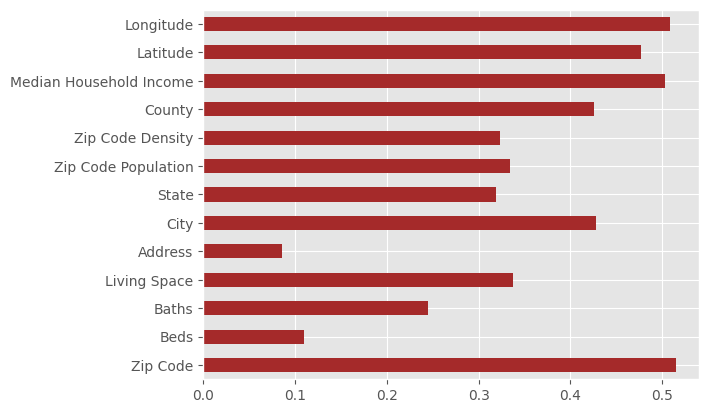

In [42]:
x = df.drop (['Price'], axis=1)
y = df['Price']
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
plt.style.use('ggplot')
importance = mutual_info_regression(x,y)
feature_impor = pd.Series(importance,x.columns[0:len(x.columns)])
feature_impor.plot(kind = 'barh', color = 'brown')
plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [44]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2,random_state=1)

In [45]:
LinearModel =Pipeline([('scaler', StandardScaler()), ('Model', LinearRegression())])
LinearModel.fit(xtrain,ytrain)

Pipeline(steps=[('scaler', StandardScaler()), ('Model', LinearRegression())])

In [46]:
pred1 = LinearModel.predict(xtest)
pred1

array([ 865835.80234204,  921108.07393493,  650078.39709909, ...,
        303056.11653198,  374775.69761161, -132989.77414582])

In [47]:
print('MAE', mean_absolute_error(ytest,pred1))
print('MAPE', mean_absolute_percentage_error(ytest,pred1))
print('MSE', mean_squared_error(ytest,pred1))
print('R2 SCORE',r2_score(ytest,pred1))

MAE 290307.7721603077
MAPE 0.8306735036782602
MSE 460405499743.7724
R2 SCORE 0.4489295513315734


In [48]:
outcome = {
    'Actual Price': ytest,
    'predicted price':pred1

} 
df3 = pd.DataFrame(outcome)
df3

,Actual Price,predicted price
33280,959000.0,865835.802342
21569,650000.0,921108.073935
33018,700000.0,650078.397099
1305,329900.0,512874.073584
30217,498750.0,694622.548816
...,...,...
23066,265000.0,19144.654505
15574,165000.0,89637.191743
18753,775000.0,303056.116532
39015,525000.0,374775.697612


<Axes: xlabel='Price'>

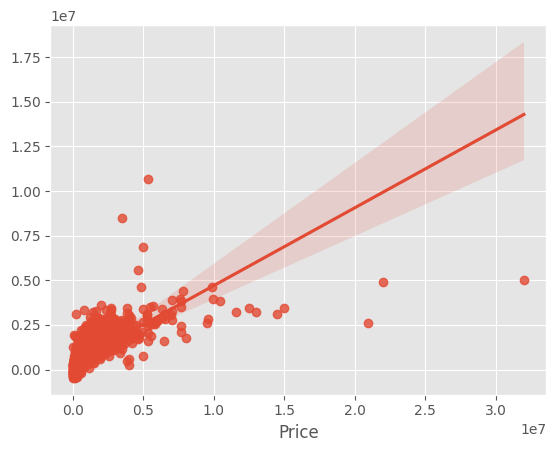

In [49]:
sns.regplot(x = ytest, y = pred1)

In [50]:
tree = DecisionTreeRegressor()
tree.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [51]:
pred2 = tree.predict(xtest)
pred2

array([1150000.,  550000.,  599000., ...,  775000.,  525000.,  149900.])

In [52]:
print('MAE', mean_absolute_error(ytest,pred2))
print('MAPE', mean_absolute_percentage_error(ytest,pred2))
print('MSE', mean_squared_error(ytest,pred2))
print('R2 SCORE',r2_score(ytest,pred2))

MAE 182721.0415530824
MAPE 0.4284402272078758
MSE 360760879045.74506
R2 SCORE 0.5681966014993421


In [53]:
outcome = {
    'Actual Price': ytest,
    'predicted price':pred2

} 
df3 = pd.DataFrame(outcome)
df3

,Actual Price,predicted price
33280,959000.0,1150000.0
21569,650000.0,550000.0
33018,700000.0,599000.0
1305,329900.0,348000.0
30217,498750.0,439000.0
...,...,...
23066,265000.0,154999.0
15574,165000.0,217000.0
18753,775000.0,775000.0
39015,525000.0,525000.0


<Axes: xlabel='Price'>

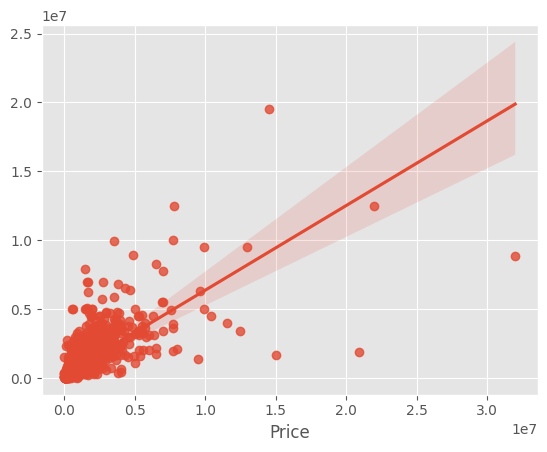

In [54]:
sns.regplot(x = ytest, y = pred2)

In [55]:
forest = RandomForestRegressor()
tree.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [56]:
pred3 = tree.predict(xtest)
pred3

array([1149000.,  550000.,  599000., ...,  775000.,  525000.,  150000.])

In [57]:
print('MAE', mean_absolute_error(ytest,pred3))
print('MAPE', mean_absolute_percentage_error(ytest,pred3))
print('MSE', mean_squared_error(ytest,pred3))
print('R2 SCORE',r2_score(ytest,pred3))

MAE 183923.3430849068
MAPE 0.43157823415082663
MSE 346581521954.80524
R2 SCORE 0.5851682160397476


In [58]:
outcome = {
    'Actual Price': ytest,
    'predicted price':pred3

} 
df3 = pd.DataFrame(outcome)
df3

,Actual Price,predicted price
33280,959000.0,1149000.0
21569,650000.0,550000.0
33018,700000.0,599000.0
1305,329900.0,348000.0
30217,498750.0,439000.0
...,...,...
23066,265000.0,154999.0
15574,165000.0,217000.0
18753,775000.0,775000.0
39015,525000.0,525000.0


<Axes: xlabel='Price'>

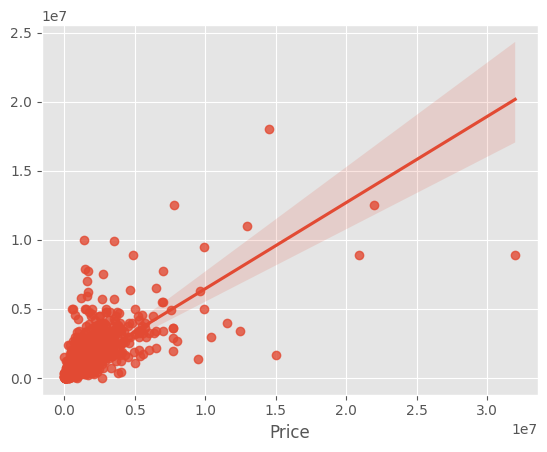

In [59]:
sns.regplot(x = ytest, y = pred3)